# Exercise 4

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Friday, 29/05/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * functions
 * *numpy* arrays

Put in here your group number: 

Group 12

# 1. Sieves with numpy (20 Points)

One mathematical algorithm to generate sequences of numbers is the sieve algorithm. In these algorithms one starts with a list of integer numbers $1,2,3,4,...$ and consecutively removes individual numbers with a given rule set. The most prominent sieves are the Sieve of Eratosthenes and the Sieve to generate Lucky numbers. In this exercise we want to implement both sieves with numpy operations.

## 1.1 The sieve of Eratosthenes (10 Points)

The sieve of Eratosthenes is an easy but effective algorithm to search for prime numbers until a given number $N$. 

You can use the following steps to implement the sieve:

 1. you can create an boolean *numpy*-array of the length $N+1$ in which all elements have the value *True*. The indices 
   in this array represents the integer numbers. At the end of the procedure all the indices of the elemnets with are *True* are    the prime numbers.
 2. set the array elements with the indices 0 and 1 to False, because they are no prime numbers
 3. start with the element at the index 2, sets all elements to *False* which are multiples of the current index. Don't change 
   the current index! For the index 2, the indices of the elements to be set to *False* are $4, 6, 8, \dots$. For the index 3
   the indices are $6, 9, 12, \cdots$, etc. 
 4. do step 3. for all indices $i$ with $2\leq i \leq \sqrt{N}$ 
 5. Finally all indices with are *True* representing prime numbers.

The following figure illustrate the algorithm. Prime numbers are marked with arrows.

<img src="prime-sieve.jpg" style="width: 400px;"> 

**Your task**:

Implement the sieve of Eratosthenes in a python function *sieve_of_eratosthenes*. The function should have only one argument, the number of elements $N$. The function should return a numpy array of the prime numbers.

**Hints**:
 * Use the numpy masking to set all mupliples of an index to *False*. 
 * you can create an bool array like this

In [1]:
import numpy as np

b = np.array([True]*20)  # create a bool numpy array with 20 elements

 * To convert the bool array into a list of numbers you can use these algorithm:

In [2]:
import numpy as np

c = [False, False, True, True, False, True]
print(np.nonzero(c)[0])

[2 3 5]


In [3]:
import sys
import numpy as np

# The following ensures that arrays are printed without truncation within a notebook
np.set_printoptions(threshold=sys.maxsize)


def sieve_of_eratosthenes(N):
    c = [True for i in range(N+1)]   #mask for the array
    c[0] =  c[1] = False    #setting the first two value to False
    p = 2    #the first prime
    while (p * p <= N):   #going until sqrt(N)
        if (c[p] == True):     # we have a prime if c[p] is unchanged 
            for i in range(p * p, N + 1, p):     #setting all multiples of the prime with False
                c[i] = False
        p = p + 1
        
    return np.nonzero(c)[0]    #getting the c's indexes which have True value


Test your code here:

In [4]:
print(sieve_of_eratosthenes(10))

[2 3 5 7]


In [5]:
assert(np.any(sieve_of_eratosthenes(10) == np.array([2,3,5,7])))

## 1.2 Lucky numbers (10 Points)

The second sieve algorithm is the generation of the so called *Lucky numbers*. These are a series of integer numbers $1,3,7,9,13,...$. The steps for the sieve are as follows:

1. begin with a list of integers starting with $1$:
   $$1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, ...$$
2. now eliminate every second number:
   $$ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, ... $$
3. the second remaining number is 3, so remove every 3rd number:
   $$ 1, 3, 7, 9, 13, 15, 19, 21, 25, ... $$
4. the next remaining number is 7, so remove every 7th number:
   $$ 1, 3, 7, 9, 13, 15, 21, 25, ... $$
5. next, remove every 9th number and so on.

**Your task**:

Write a function *lucky_numbers* which has one argument $N$ which is the maximum number to be checked. The function should return a numpy array which contains the lucky numbers smaller or equal $n$. Choose a proper return value for the case $N=0$ and $N=1$. It is forbidden to loop over elements, only numpy functions are allowed! In comparison to the sieve of Eratosthenes you will reduce the elements of the list of numbers in each step by masking instead of creating a full mask for the prime numbers.

**Hints**:
* use a while loop for all the masking steps, the loop should end when the current index is reaching the length of the array. Note here that the length is changing in every step!
* in each step create a bool mask in which you define which element should be masked out with *False* and apply this mask
  to get a new array

In [6]:
import numpy as np


def lucky_numbers(N):
    
    i = 1 #current iteration's index of step value
    b = np.arange(1, N + 1) #current lucky numbers
    
    while b[i] < len(b):    #b[i] =  current iteration's step, we make sure that we don't exceed the length of the array
        c = np.zeros(len(b), dtype=int)     #current iteration's mask of the lucky numbers
        for j in range(0, len(c) - b[i] + 1, b[i]):    #setting the mask according to the step
            c[j + b[i] - 1] = 1   
        i = i + 1 - c[np.searchsorted(b, b[i])]    #advance the index of step value if the step's value was not masked 
        b = np.ma.array(b, mask=c)[c == 0]    #masking the shrinking b

    return b 



Your test cell:

In [7]:
print(lucky_numbers(10))

[1 3 7 9]


In [8]:
b = lucky_numbers(13)
assert(np.all(b == np.array([1,3,7,9,13], dtype=np.int64) ))

# 2. Sampling problem (10 Points)

In the first exercise we had a documentation about the Bessel functions. We will again look at the Bessel functions of the first kind which can be written for $x\gg n$ in the asymptotic form:

$$J_n(x) \approx \sqrt{\frac{2}{\pi x}}\cos(x-(n\frac{\pi}{2}+\frac{\pi}{4}))$$

As you can see it is a periodic function which envelope scales with $\approx \sqrt{\frac{1}{x}}$. 

For different values of $n$ for $x\gg n$ the periodic approximations only differ in the phase, so we can use $n=0$ as an example.

Usually to plot a function with matplotlib you're using a $x$ array created with *np.linspace* in an interval $[a,b]$, calculate the function values $y$  and plot $x$ vs. $y$. If we are doing so, we get the plot from the interval $[0.1,50]$ (left plot) and $[0.1,300]$ (right plot). 
<table>
    <tr>
        <td><img src="bessel50_plot.png"/></td>
        <td><img src="bessel300_plot.png"/></td>
    </tr>
</table>
In both plots the red lines are the upper envelopes of the Bessel functions. As one can see the right plot looks not as expected whereas the left one fits nicely the envelope function. 

This problem is well understood and described as the Nyquist sampling (have a look at this [page](http://microscopy.berkeley.edu/courses/dib/sections/02Images/sampling.html)). It basically means that the amount of numbers which is used for the plot is too small in the right plot. 

During the discussions of this problem is how to quantify how good the sampling of the function would be. One idea 
was that undersampled periodic functions have less roots than a well sampled functions. Your task would be to calculate the minimum number of elements a sampled Bessel function should have.

**Your task**:

 * implement the $J_0$ function.
 * write a function *min_samples* and calculates the minimum number of elements necessary to make a proper plot for $J_0$ from $0.1$ until $300$ and plot the function. Do the plot looks now okay? *min_samples* should accept two parameters $a$ and $b$ which describes the plot interval and should return an integer as the result.



We use the Nyquist theorem. It states that if a function $x(t)$ contains no frequencies higher than $f$, it is completely determined by giving its ordinates at a series of points spaced $\frac{1}{2f}$ units apart. A sufficient sample-rate is therefore anything larger than $2f$ samples per unit. 

To implement the theorem we pick an interval $I = [a,b]$ and consider an arbitrary sampling. Here we've choosen a number of points equal to $100(b-a)$.  Then we look for the local maxima of the function $J_0$ in this interval. The more points we have, the better are the maxima approximated. Computing the distance between these points on the $x_axis$ we get the periods. The theorem tells us to consider the highest frequency. Since $f= \frac{1}{T}$, we have to consider the shortest period, $T_{min}$. The minimum number of points that we must require is then 
\begin{equation}
n_{min}=\frac{2|b-a|}{T}
\end{equation}

In [9]:
import numpy as np

def J_0(x):
    return np.sqrt(2/(x*np.pi))*np.cos(x - np.pi/4)

def min_sample(a, b):
    
    #It creates a preliminary sampling, dividing the interval in steps.
    n = int((b - a))*100
    step = (b-a)/n #Length of a step.
    points = np.linspace(a, b, n)
    values = J_0(points)
    
    local_maxima = []
    periods = []
    i, j, k = 0, 0, 0
   
    #Searching for the local maxima.
    while (j < len(values) - 2):
        if (values[j+1] > values[j] and values[j+1] > values[j+2]):
            local_maxima.append(j+1)
        j = j + 1
       
   #Computing the distance between the minima.
    while (k < len(local_maxima) - 1):
        diff = (np.abs(local_maxima[k+1] - local_maxima[k]))*step
        periods.append(diff)
        k = k + 1
    #It computes the shortest period
    min_period = min(periods)
    
    #It returns the lowest integer greater than the values found before.
    return int(np.ceil((b - a)*2/min_period))   


Write here your own tests:

The minimum number of points necessary to make a proper plot is 96


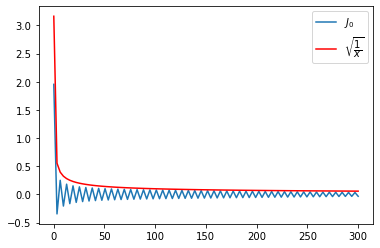

In [10]:
#Test the function for a = 0.1, b = 300 and make a plot.
%matplotlib inline
import matplotlib.pyplot as plt

minimum = min_sample(0.1,300)
print("The minimum number of points necessary to make a proper plot is", minimum)

x_axis = np.linspace(0.1, 300, minimum)
y_axis = J_0(x_axis)
envelope = np.sqrt(1/x_axis)

plt.plot(x_axis, y_axis, label = '$J_0$')
plt.plot(x_axis, envelope, color = 'red', label = '$\sqrt{\dfrac{1}{x}}$')
plt.legend()

Now the plot looks perfectly fine.

In [11]:
assert(min_sample(0.1,300) == 96)

# 3. A fair game? (20 Points)

A gambler offers you the following game:
1. To play one game, you have to pay him 600 Euros.
2. For each game you have to give him a limit between 2 and 999 Euros.
3. He gives you an envelope with an arbitraty amount of money (uniform distribution) between 1 and 1000 Euros.
4. If the amount of money in the envelope is equal or above your limit of (2.) you have to accept the money and the game ends.
5. If the amount of money in the envelope is below your limit of (2), he gives you a new envelope - again with an arbitrary amount of money between 1 and 1000 Euros. You have to accept the amount of money in the second envelope and the game ends. Note that the amount of money in the second envelope can be lower than what you would have got with the first one!


In this task, we want to check, with which strategy for the limit of (2) the game  is favourable for you. The game is said to be favourable if the *expectation value* of your win minus the initial bet of 600 Euros is positive.

**Your tasks**:

1. Write a function `win` which takes the limit of (2) as an argument. Within the function perform 20000 simulation of the game. The function should return the mean and the standard deviation of the win from the 20000 realisations.

  **Hints / Remarks:** 
  1. a *numpy*-array with the necessary random numbers can be created with the `numpy.random.uniform` function; 
  2. besides the creation of the initial array of random numbers, the function can be done with 2-3 essential lines of code using boolean indexing and array assignments; it is very similar to the *estimation of $\pi$*-example we did in the lecture stream; 
  3. mean and standard deviation of a *numpy*-array can be obtained with the function `np.mean` and `np.std`. 
  4. you are **not** allowed to use any loop constructs over the 20000 simulations within this function.
  
2. In the main body of your program, loop over possible limits from 1 to 999 Euros, obtain the win expectation with those strategies and store these values in a *numpy*-array. Make a plot of the expected win values. For wich strategies is the game favourable for you?

  **Hint:** We will learn later, how you could do also this task without a loop-construct.
  
3. Finally, consider playing games with setting the limit arbitrarily between 1 and 999 Euros for each game. What is the expected win and the standard deviation in that case?  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()